# 1. 데이터 가져오기
- `sklearn.datasets`의 `load_diabetes`에서 데이터를 가져와주세요.
- `diabetes`의 `data`를 `df_X`에, `target`을 `df_y`에 저장해주세요.

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes() # 당뇨병 데이터 불러오기
df_X = diabetes['data']
df_y = diabetes['target']

# 2. 모델에 입력할 데이터 X 준비하기
- `df_X`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [2]:
print(type(df_X)) # 이미 numpy array로 변환되어있음

<class 'numpy.ndarray'>


# 3. 모델에 예측할 데이터 y 준비하기
- `df_y`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [3]:
print(type(df_y)) # 이미 numpy array로 변환되어있음

<class 'numpy.ndarray'>


# 4. train 데이터와 test 데이터로 분리하기
- `X`와 `y` 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [4]:
from sklearn.model_selection import train_test_split

# 데이터셋을 train용과 test용으로 분리
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape, y_train.shape) # train 데이터셋 형태 확인
print(X_test.shape, y_test.shape)   # test 데이터셋 형태 확인

(353, 10) (353,)
(89, 10) (89,)


# 5. 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 `W`와 `b`를 준비해주세요.
- 모델 함수를 구현해주세요.

In [6]:
import numpy as np

W = np.random.random(10) # 특성 10개에 대한 가중치
b = np.random.random()   # 편향

In [7]:
print(W) # 초기화된 가중치 확인

[0.06791858 0.07437042 0.66431486 0.19244219 0.2487025  0.43161335
 0.05799499 0.80446989 0.15074561 0.07495543]


In [8]:
print(b) # 초기화된 편향 확인

0.7233935211586127


In [9]:
def model(X, W, b):  # X: (batch, features), W: (features,), b: (1, )
    y = X.dot(W) + b
    return y         # y: (batch, )

In [10]:
# 결과값 크기 확인용
#X = np.random.random((16, 10))
#model(X, W, b).shape

# 6. 손실함수 `loss` 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [11]:
# MSE 계산
def MSE(y_pred, y):
    return ((y_pred - y) ** 2).mean()

In [12]:
# 파라미터와 데이터셋의 Loss값 계산
def loss(X, W, b, y):
    y_pred = model(X, W, b)
    return MSE(y_pred, y)

# 7. 기울기를 구하는 `gradient`함수 구현하기
- 기울기를 계산하는 `gradient` 함수를 구현해주세요.

In [13]:
def gradient(X, W, b, y): # X: (batch, features), W: (batch,), b: (1, ), y: (batch, )
    # 그래디언트 연산을 위해 필요한 값
    y_pred = model(X, W, b)
    N = len(y)
    
    # Loss가 MSE인 선형 회귀 모델의 그래디언트 연산
    dW = 1/N * 2 * (X.T.dot(y_pred - y))
    db = 2 * (y_pred - y).mean()
    return dW, db         # dW: (features, ), db: (1, )

In [14]:
# 결과값 크기 확인용
#X = np.random.random((16, 10))
#y = np.random.random(16)

#dW, db = gradient(X, W, b, y)
#print(dW.shape, db.shape)

# 8. 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate값을 한번 여러 가지로 설정하며 실험해 보세요.

In [15]:
# 하이퍼 파라미터
LEARNING_RATE = 0.7 # 학습률

# 9. 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 `x`에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [16]:
losses = []
max_epochs = 10000

# 모델 학습
for i in range(1, max_epochs + 1):
    # 그래디언트 계산
    dW, db = gradient(X_train, W, b, y_train)
    
    # 손실함수 계산
    L = loss(X_train, W, b, y_train)
    losses.append(L) # 각 epoch당 손실함수 저장
    
    # 경사하강법에 따라 파라미터 업데이트
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    
    # 중간 결과 출력
    if i % 50 == 0:
        print("Iteration %04i: loss = %.04f" % (i, L))

Iteration 0050: loss = 4368.9319
Iteration 0100: loss = 3713.0037
Iteration 0150: loss = 3414.2981
Iteration 0200: loss = 3249.9006
Iteration 0250: loss = 3146.7879
Iteration 0300: loss = 3077.3159
Iteration 0350: loss = 3028.8061
Iteration 0400: loss = 2994.2959
Iteration 0450: loss = 2969.4634
Iteration 0500: loss = 2951.4409
Iteration 0550: loss = 2938.2615
Iteration 0600: loss = 2928.5529
Iteration 0650: loss = 2921.3478
Iteration 0700: loss = 2915.9600
Iteration 0750: loss = 2911.8994
Iteration 0800: loss = 2908.8140
Iteration 0850: loss = 2906.4497
Iteration 0900: loss = 2904.6220
Iteration 0950: loss = 2903.1961
Iteration 1000: loss = 2902.0730
Iteration 1050: loss = 2901.1796
Iteration 1100: loss = 2900.4614
Iteration 1150: loss = 2899.8778
Iteration 1200: loss = 2899.3983
Iteration 1250: loss = 2898.9996
Iteration 1300: loss = 2898.6641
Iteration 1350: loss = 2898.3783
Iteration 1400: loss = 2898.1318
Iteration 1450: loss = 2897.9165
Iteration 1500: loss = 2897.7261
Iteration 

# 10. test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.

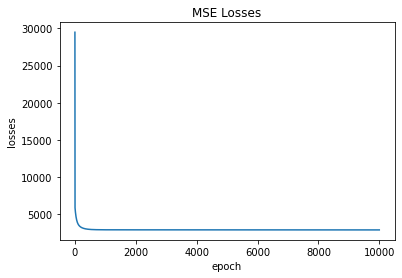

In [17]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title('MSE Losses')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [18]:
# epoch에 따른 Loss값 그래프
y_test_pred = model(X_test, W, b)
print("test loss =", MSE(y_test_pred, y_test))

test loss = 2886.212004747658


# 11. 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해주세요

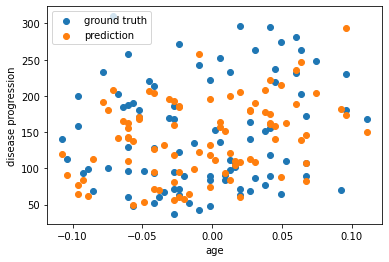

In [19]:
# test 데이터셋의 실제 값과 모델의 예측값 비교
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], y_test_pred)

plt.legend(['ground truth', 'prediction'])
plt.xlabel('age')
plt.ylabel('disease progression')
plt.show()